In [1]:
import h5py, numpy as np, matplotlib.pyplot as plt

In [2]:
with h5py.File('sigres.h5','r') as ipt:
    sigres = ipt['evtinfo'][:]

In [3]:
with h5py.File('bkgres.h5','r') as ipt:
    bkgres = ipt['evtinfo'][:]

## nMichel=1,qEdep(200,600),eDepR(,17500],E1(20,240),E2(85,430)
### nTag=0, michelDist(,800], chisquare>1.11, FitTime>6.0
+ sig: 2789 0.2789
+ bkg: 1
### nTag=1, nTagR<700, chisquare>1.1, FitTime>8.0
+ sig: 441 0.0441
+ bkg: 0
### nTag>=2, michelDist(,800], nTagR<700, chisquare>1.1, FitTime>7
+ sig: 203 0.0203
+ bkg: 0
### nTag>=1, michelDist(,700], nTagR<750, chisquare>1.1, FitTime>8
+ sig: 640 0.0640
+ bkg: 0

+ sig: 3433 0.3433
+ bkg: 1

+ sig: 3372 0.3372
+ bkg: 1

In [209]:
(2789+203+441,2789+640,2881+615)

(3433, 3429, 3496)

In [138]:
2789+583+33+202

3607

In [ ]:
info=sigres
qel=200
qer=600,eRr=17500
fig,ax=plt.subplots()
index = (info['nMichel']>0)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)
h=ax.hist2d(info[index]['chisquare2'],info[index]['chi2']/(info[index]['ndf']-6), bins=[100,100],cmap=cmap)
fig.colorbar(h[3])
ax.set_xlabel('cc chisquare2')
ax.set_ylabel('cc chi2')
ax.set_title(' edepR<{} Qedep[{},{}] nCap(,{}] entries:{}'.format(eRr,qel,qer,nCr,len(info[index])))
#plt.savefig('compare/{}{}Gyhchi2EdepR{}Qedep{}-{}nC-{}.png'.format(name,xname,eRr,qel,qer,nCr))
fig,ax=plt.subplots()
h=ax.hist2d(info[index]['chisquare1'],info[index]['chi1']/(info[index]['ndf']-4), bins=[100,100],cmap=cmap)
fig.colorbar(h[3])
ax.set_xlabel('cc chi1')
ax.set_ylabel('cc chi1')
ax.set_title(' edepR<{} Qedep[{},{}] nCap(,{}] entries:{}'.format(eRr,qel,qer,nCr,len(info[index])))
#plt.savefig('compare/{}{}Gyhchi1EdepR{}Qedep{}-{}nC-{}.png'.format(name,xname,eRr,qel,qer,nCr))

In [144]:
sigres[sigres['eid']==65]

array([(65, -17197.793, 7.290193, 22.16789, 0., 98.567276, 299.72165, 0., 0.85771763, 23.152243, 0., 3, 398.28894, 0.6116669, 2107.1462, 405.55286, 1343.0001, 372.31937, 280, 18., 1.3529412, 7., 1, 1, 475.25443, 14628.352, 766.1999)],
      dtype=[('eid', '<i4'), ('likelihood', '<f4'), ('E1', '<f4'), ('E2', '<f4'), ('E3', '<f4'), ('E1Norm', '<f4'), ('E2Norm', '<f4'), ('E3Norm', '<f4'), ('t1', '<f4'), ('t2', '<f4'), ('t3', '<f4'), ('npeak', '<i2'), ('Qedep', '<f4'), ('bkg', '<f4'), ('chisquare1', '<f4'), ('chisquare2', '<f4'), ('chi1', '<f4'), ('chi2', '<f4'), ('ndf', '<i2'), ('Up90', '<f4'), ('t10080', '<f4'), ('over5090', '<f4'), ('nCap', '<i2'), ('nMichel', '<i2'), ('michelDist', '<f4'), ('edepR', '<f4'), ('nDist', '<f4')])

In [8]:
def e1e2np(info,xname='E1',yname='E2',nm=0,qel=200,qer=600,eRr=17500,nCr=3,mRr=17000,np=2,name='bkg'):
    fig,ax=plt.subplots()
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)&(info['michelDist']<=mRr)&(info['npeak']==np)
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    fig.colorbar(h[3])
    ax.set_title('nMichel:{} edepR<{} Qedep[{},{}] nCap(,{}] michelR({}] entries:{}'.format(nm,eRr,qel,qer,nCr,mRr,len(info[index])))
    plt.savefig('compare/{}{}{}Nm{}EdepR{}Qedep{}-{}nC-{}mD-{}np-{}.png'.format(name,xname,yname,nm,eRr,qel,qer,nCr,mRr,np))

In [ ]:
e1e2np(sigres,'E1Norm','E2Norm',nm=1,np=2,name='sig')

In [ ]:
e1e2np(sigres,'E1Norm','E2Norm',nm=1,np=3,name='sig')

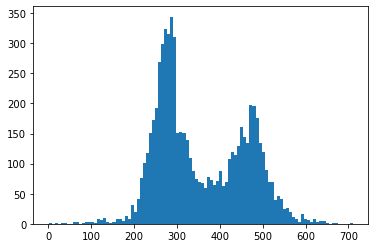

In [12]:
plt.hist(sigres[sigres['npeak']==3]['Qedep'],bins=100)
plt.show()

In [5]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
jet = plt.cm.jet
newcolors = jet(np.linspace(0, 1, 32768))
white = np.array([1, 1, 1, 0.5])
newcolors[0, :] = white
cmap = ListedColormap(newcolors)
def e1e2(info,xname='E1',yname='E2',nm=0,qel=200,qer=600,eRr=17500,nCr=3,mRr=17000,name='bkg'):
    fig,ax=plt.subplots()
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    fig.colorbar(h[3])
    ax.set_title('nMichel:{} edepR<{} Qedep[{},{}] nCap(,{}] michelR({}] entries:{}'.format(nm,eRr,qel,qer,nCr,mRr,len(info[index])))
    plt.savefig('compare/{}{}{}Nm{}EdepR{}Qedep{}-{}nC-{}mD-{}.png'.format(name,xname,yname,nm,eRr,qel,qer,nCr,mRr))

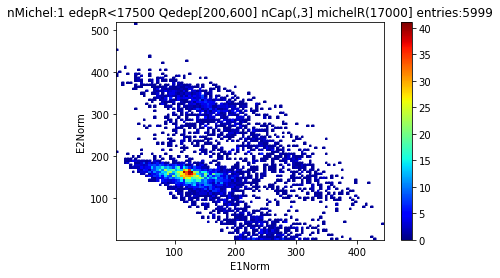

In [98]:
e1e2(sigres,'E1Norm','E2Norm',nm=1,name='sig')

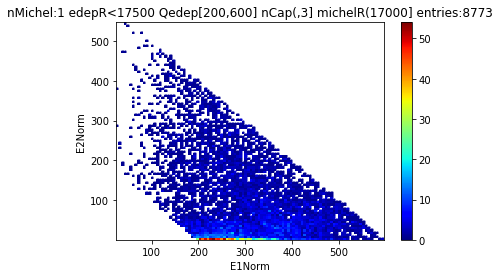

In [99]:
e1e2(bkgres,'E1Norm','E2Norm',nm=1,name='bkg')

In [171]:
def cutThreshold1(info,xname='E1Norm',yname='E2Norm',nm=0,qel=200, qer=600,eRr=17500,nCr=3,mRr=170000,t12=6.0,chi12=1,name='bkg'):
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']==nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['E2Norm'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('E2Norm')
    ax.set_ylabel('FitTime')
    ax.set_title('E2-FitTime')
    fig.colorbar(h[3])
    index = index&((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm')
    ax.set_ylabel('E2Norm')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90/ns')
    ax.set_ylabel('FitTime/ns')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    
    index = index&(((info['E2Norm']>85)&(info['E2Norm']<260))|((info['E2Norm']>=260)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)#&((info['E1Norm']-info['E2Norm'])<40)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    #index = index&((info['Up90']>=8)&(info['Up90']<2*(info['t2']-info['t1'])))
    #index = index&(info['Up90']>=8.5)#&(info['Up90']<2*(info['t2']-info['t1']))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['chisquare1']>info['chisquare2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&((info['chisquare1']>info['chisquare2']*1.11)&((info['t2']-info['t1'])>chi12))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))

    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    ax.hist2d(info[index]['chisquare1']/info[index]['chisquare2'],info[index]['t2']-info[index]['t1'],bins=[100,100])
    ax.set_title('FitTime-chi12')
    ax.set_ylabel('FitTime/ns')
    ax.set_xlabel('chi12')
    fig,ax=plt.subplots()
    ax.hist(info[index]['t2']-info[index]['t1'],bins=100,range=[0,10])
    ax.set_title('FitTime distribution')
    ax.set_xlabel('{}/ns'.format('FitTime'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['michelDist'],bins=100)
    ax.set_title('michelDist distribution')
    ax.set_xlabel('{}/mm'.format('michelDist'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['chisquare1']/info[index]['chisquare2'],bins=100)
    ax.set_title('chisquare12 distribution')
    ax.set_xlabel('{}'.format('chisquare'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['Up90'],bins=100,range=[0,100])
    ax.set_xlabel('Up90/ns')
    ax.set_title('Up90 distribution')
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90')
    ax.set_ylabel('FitTime')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
# nMichel=1,qEdep(200,600),eDepR(,17500],michelDist(,700],chisquare>1.5,FitTime>=6.2,E1(30,195),E2(100,430)
# sig: 3609 0.3609
# bkg: 2

4066 7927 0.512930490727892 0.4066
3112 7927 0.3925823136117068 0.3112
2861 7927 0.36091838021950295 0.2861
2861 7927 0.36091838021950295 0.2861
2861 7927 0.36091838021950295 0.2861
2789 7927 0.35183549892771543 0.2789


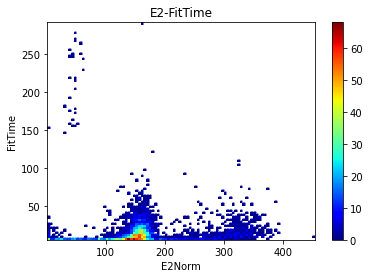

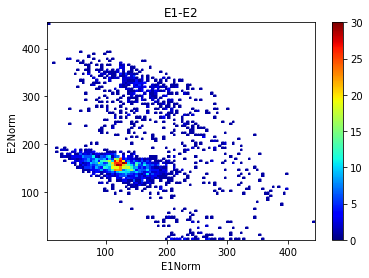

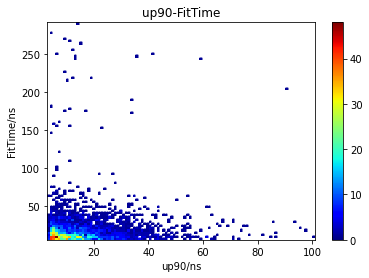

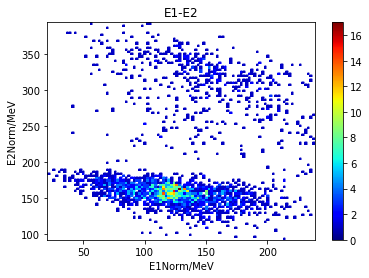

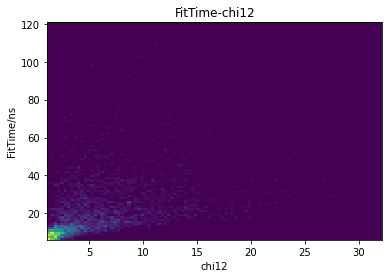

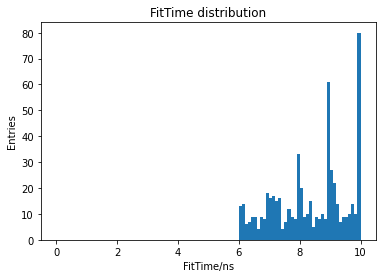

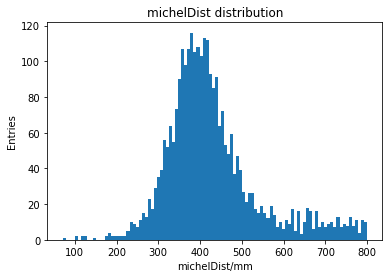

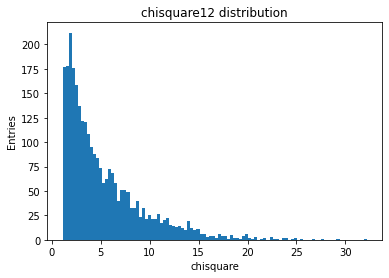

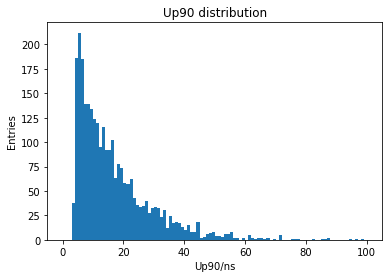

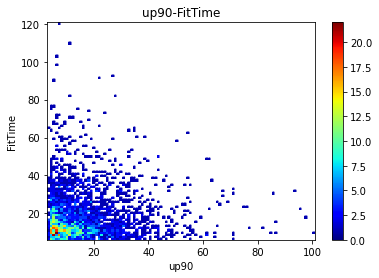

In [172]:
cutThreshold1(sigres,nm=1,nCr=0,mRr=800)

2603 47741 0.054523365660543346 0.016269563478173907
1265 47741 0.02649714082235395 0.007906645332266614
71 47741 0.0014871913030728304 0.0004437721886094305
71 47741 0.0014871913030728304 0.0004437721886094305
71 47741 0.0014871913030728304 0.0004437721886094305
34 47741 0.000712176116964454 0.00021251062553127655


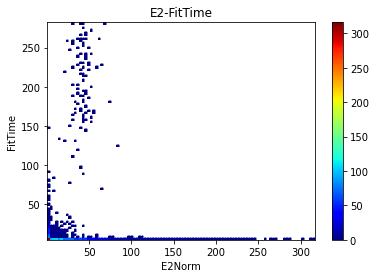

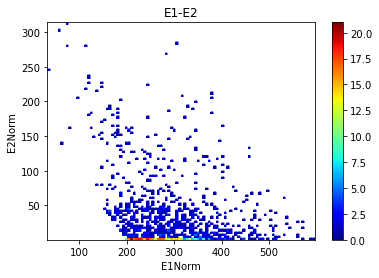

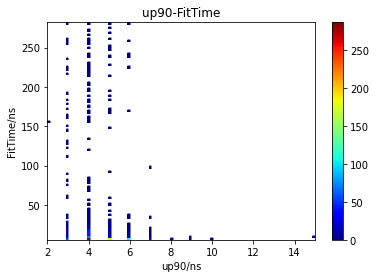

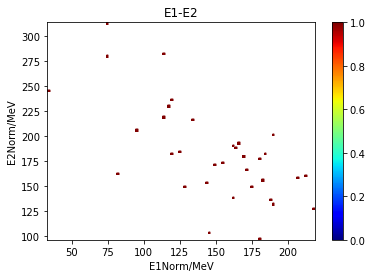

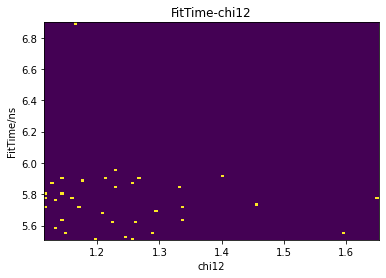

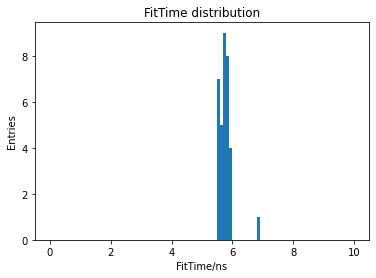

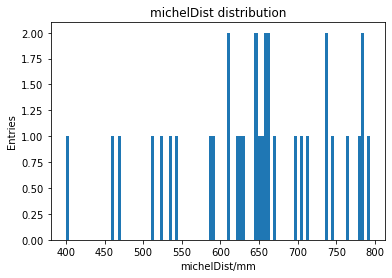

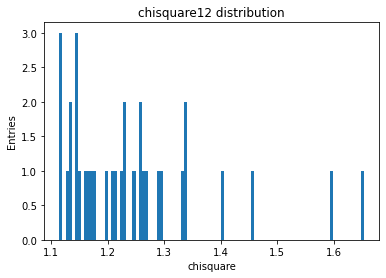

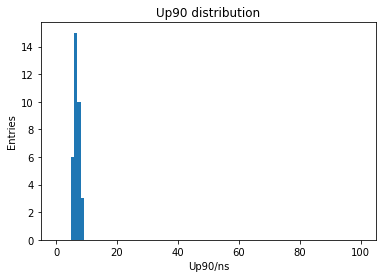

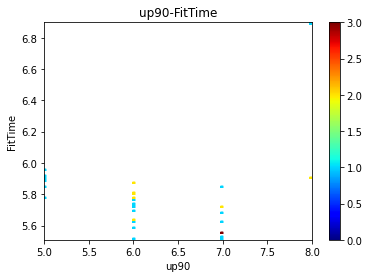

In [170]:
cutThreshold1(bkgres,nm=1,nCr=0,mRr=800)

In [115]:
def cutThreshold1n1(info,xname='E1Norm',yname='E2Norm',nm=0,qel=200, qer=600,eRr=17500,nCr=1,mRr=17000,nRr=700,t12=8,chi12=1.1,name='bkg'):
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']==nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['E2Norm'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('E2Norm')
    ax.set_ylabel('FitTime')
    ax.set_title('E2-FitTime')
    fig.colorbar(h[3])
    index = index&(((info['E2Norm']>85)&(info['E2Norm']<260))|((info['E2Norm']>=260)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)#&((info['E1Norm']-info['E2Norm'])<40)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))

    index = index&((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm')
    ax.set_ylabel('E2Norm')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90/ns')
    ax.set_ylabel('FitTime/ns')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    
    #index = index&((info['Up90']>=8)&(info['Up90']<2*(info['t2']-info['t1'])))
    #index = index&(info['Up90']>=8.5)#&(info['Up90']<2*(info['t2']-info['t1']))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['chisquare1']>info['chisquare2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&((info['chisquare1']>info['chisquare2']*1.1)|((info['t2']-info['t1'])>6.8))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['nDist']<nRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    ax.hist2d(info[index]['chisquare1']/info[index]['chisquare2'],info[index]['t2']-info[index]['t1'],bins=[100,100])
    ax.set_title('FitTime-chi12')
    ax.set_ylabel('FitTime/ns')
    ax.set_xlabel('chi12')
    fig,ax=plt.subplots()
    ax.hist(info[index]['t2']-info[index]['t1'],bins=100,range=[0,10])
    ax.set_title('FitTime distribution')
    ax.set_xlabel('{}/ns'.format('FitTime'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['michelDist'],bins=100)
    ax.set_title('michelDist distribution')
    ax.set_xlabel('{}/mm'.format('michelDist'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['chisquare1']/info[index]['chisquare2'],bins=100)
    ax.set_title('chisquare12 distribution')
    ax.set_xlabel('{}'.format('chisquare'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['Up90'],bins=100,range=[0,100])
    ax.set_xlabel('Up90/ns')
    ax.set_title('michelDist distribution')
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90')
    ax.set_ylabel('FitTime')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    fig,ax=plt.subplots()
    ax.hist(info[index]['nDist'],bins=100)
    ax.set_title('nCapture distribution')
    ax.set_xlabel('{}'.format('nCapture'))
    ax.set_ylabel('{}'.format('Entries'))
# nMichel=1,qEdep(200,600),eDepR(,17500],michelDist(,700],chisquare>1.5,FitTime>=6.2,E1(30,195),E2(100,430)
# sig: 3609 0.3609
# bkg: 2

1393 47741 0.02917827443916131 0.008706685334266714
123 47741 0.002576401834900819 0.0007687884394219711
1 47741 2.0946356381307473e-05 6.250312515625781e-06
1 47741 2.0946356381307473e-05 6.250312515625781e-06
1 47741 2.0946356381307473e-05 6.250312515625781e-06
1 47741 2.0946356381307473e-05 6.250312515625781e-06
0 47741 0.0 0.0


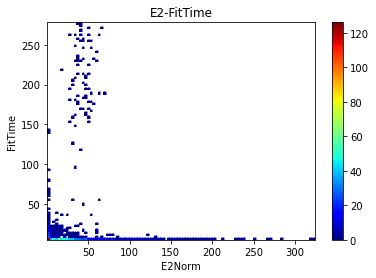

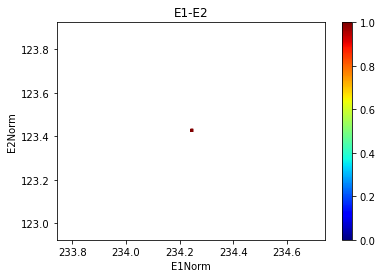

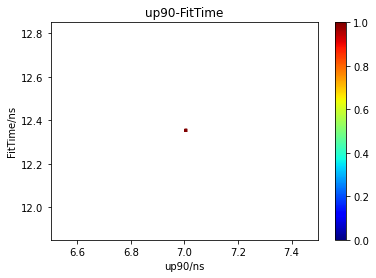

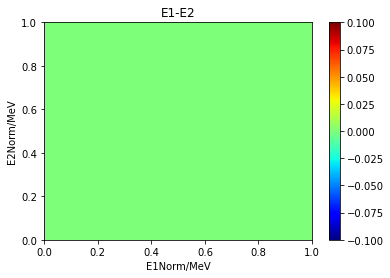

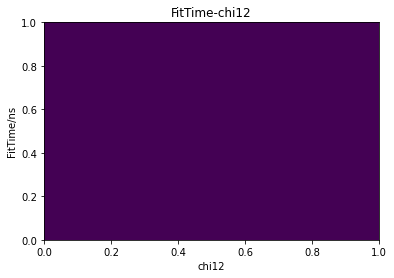

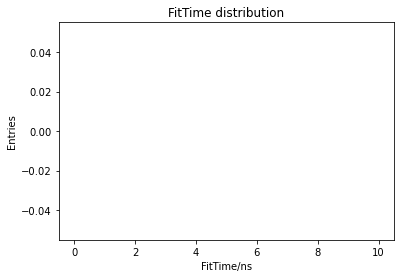

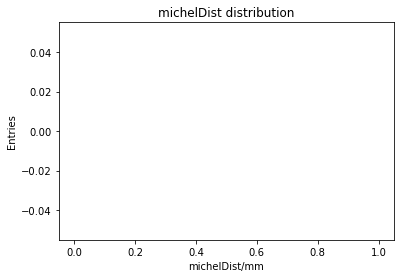

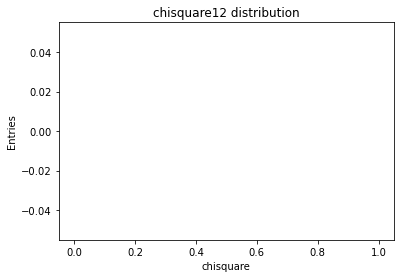

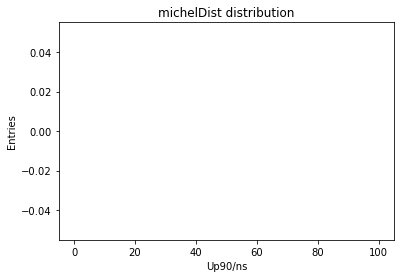

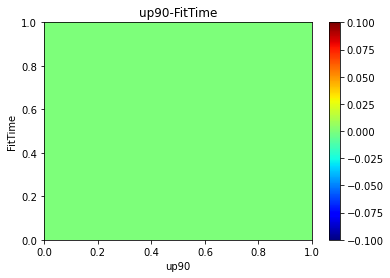

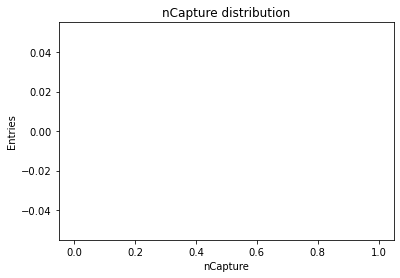

In [116]:
cutThreshold1n1(bkgres,nm=1,nCr=1,mRr=700)

794 7927 0.10016399646776838 0.0794
656 7927 0.08275514065850889 0.0656
491 7927 0.06194020436482907 0.0491
491 7927 0.06194020436482907 0.0491
488 7927 0.06156175097767125 0.0488
488 7927 0.06156175097767125 0.0488
441 7927 0.05563264791219882 0.0441


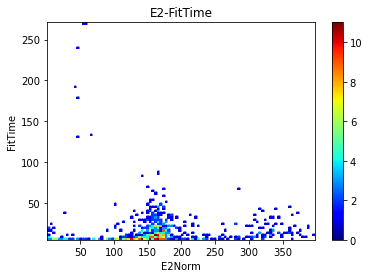

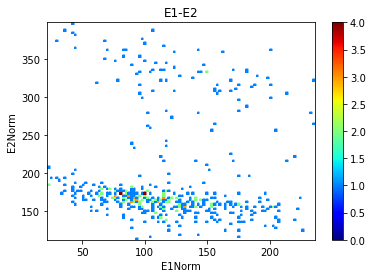

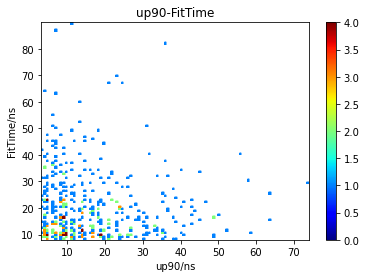

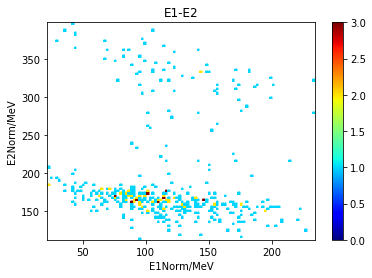

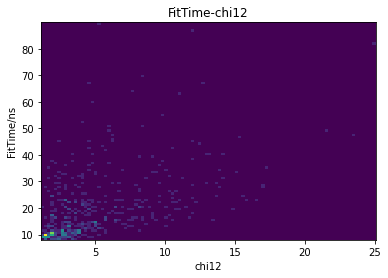

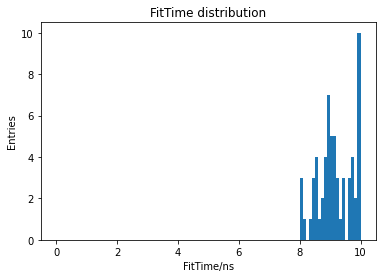

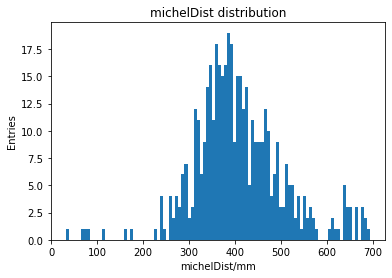

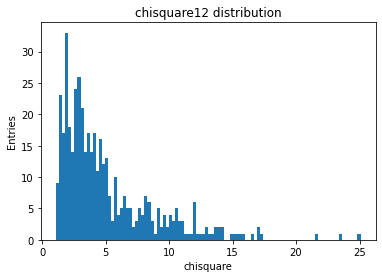

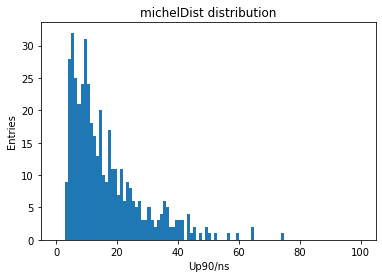

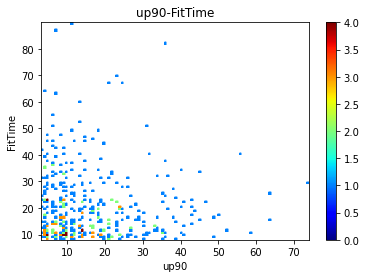

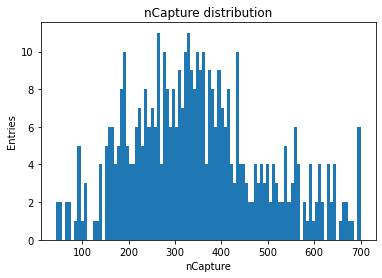

In [117]:
cutThreshold1n1(sigres,nm=1,nCr=1,mRr=700)

In [200]:
def cutThreshold1n12(info,xname='E1Norm',yname='E2Norm',nm=0,qel=200, qer=600,eRr=17500,nCr=1,mRr=17000,nRr=17700,t12=8,chi12=1.1,name='bkg'):
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']>=nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['E2Norm'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('E2Norm')
    ax.set_ylabel('FitTime')
    ax.set_title('E2-FitTime')
    fig.colorbar(h[3])
    index = index&((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm')
    ax.set_ylabel('E2Norm')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90/ns')
    ax.set_ylabel('FitTime/ns')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    
    index = index&(((info['E2Norm']>85)&(info['E2Norm']<260))|((info['E2Norm']>=260)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)#&((info['E1Norm']-info['E2Norm'])<40)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&((info['Up90']>=8)&(info['Up90']<2*(info['t2']-info['t1'])))
    #index = index&(info['Up90']>=8.5)#&(info['Up90']<2*(info['t2']-info['t1']))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    # index = index&(info['chi1']>info['chi2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&((info['chisquare1']>info['chisquare2']*1.1)&((info['t2']-info['t1'])>7.7))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['nDist']<nRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #print(info[index])
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    ax.hist2d(info[index]['chisquare1']/info[index]['chisquare2'],info[index]['t2']-info[index]['t1'],bins=[100,100])
    ax.set_title('FitTime-chi12')
    ax.set_ylabel('FitTime/ns')
    ax.set_xlabel('chi12')
    fig,ax=plt.subplots()
    ax.hist(info[index]['t2']-info[index]['t1'],bins=100,range=[0,10])
    ax.set_title('FitTime distribution')
    ax.set_xlabel('{}/ns'.format('FitTime'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['michelDist'],bins=100)
    ax.set_title('michelDist distribution')
    ax.set_xlabel('{}/mm'.format('michelDist'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['chisquare1']/info[index]['chisquare2'],bins=100)
    ax.set_title('chisquare12 distribution')
    ax.set_xlabel('{}'.format('chisquare'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['Up90'],bins=100,range=[0,100])
    ax.set_xlabel('Up90/ns')
    ax.set_title('michelDist distribution')
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90')
    ax.set_ylabel('FitTime')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    fig,ax=plt.subplots()
    ax.hist(info[index]['nDist'],bins=100)
    ax.set_title('nCapture distribution')
    ax.set_xlabel('{}'.format('nCapture'))
    ax.set_ylabel('{}'.format('Entries'))
# nMichel=1,qEdep(200,600),eDepR(,17500],michelDist(,700],chisquare>1.5,FitTime>=6.2,E1(30,195),E2(100,430)
# sig: 3609 0.3609
# bkg: 2

1204 7927 0.15188595937933644 0.1204
789 7927 0.09953324082250536 0.0789
701 7927 0.08843194146587612 0.0701
701 7927 0.08843194146587612 0.0701
701 7927 0.08843194146587612 0.0701
695 7927 0.08767503469156049 0.0695
640 7927 0.08073672259366721 0.064


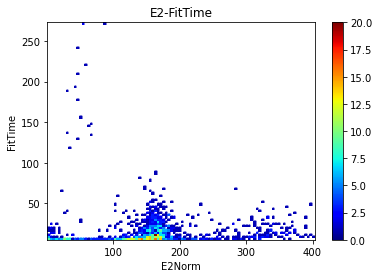

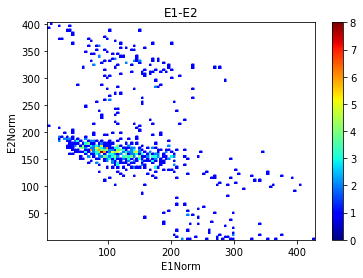

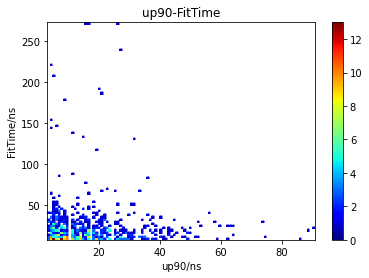

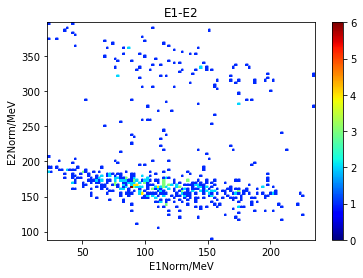

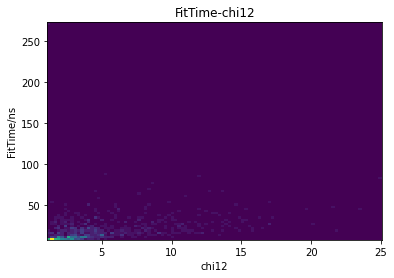

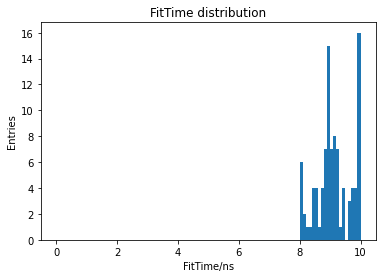

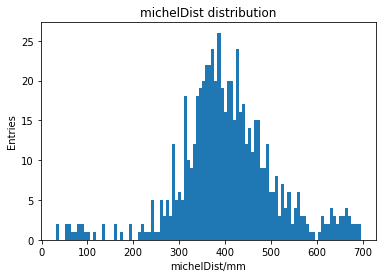

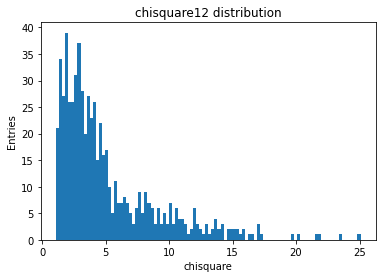

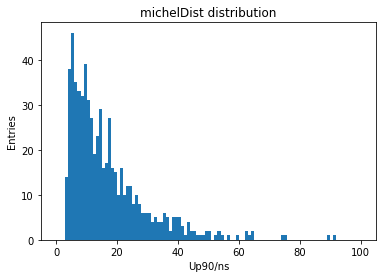

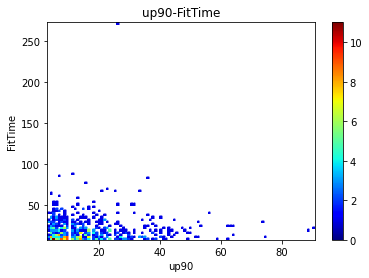

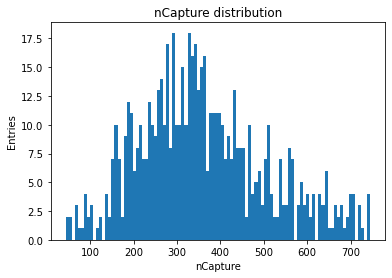

In [207]:
cutThreshold1n12(sigres,nm=1,nCr=1,mRr=700,nRr=750)

2771 47741 0.058042353532603 0.01731961598079904
779 47741 0.01631721162103852 0.0048689934496724836
18 47741 0.00037703441486353447 0.00011250562528126406
18 47741 0.00037703441486353447 0.00011250562528126406
18 47741 0.00037703441486353447 0.00011250562528126406
13 47741 0.00027230263295699713 8.125406270313516e-05
0 47741 0.0 0.0


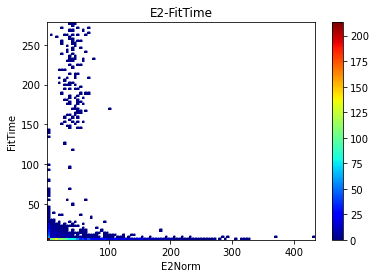

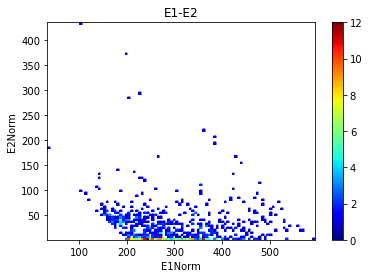

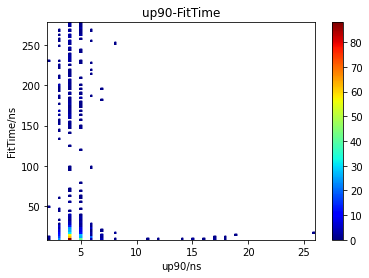

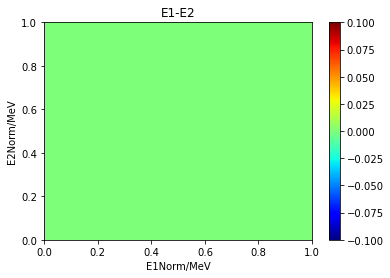

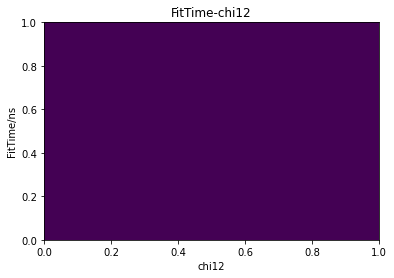

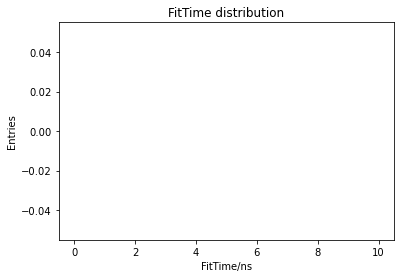

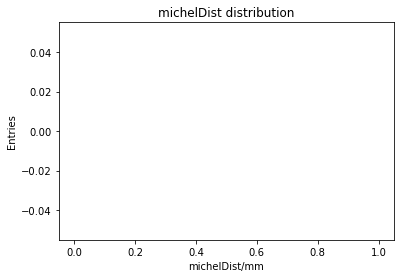

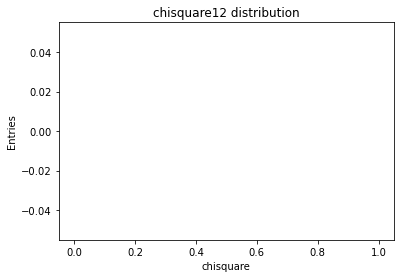

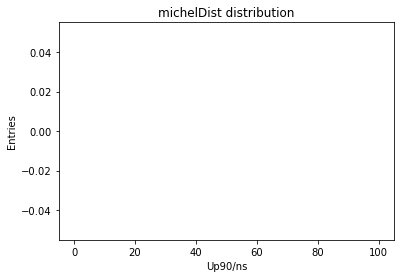

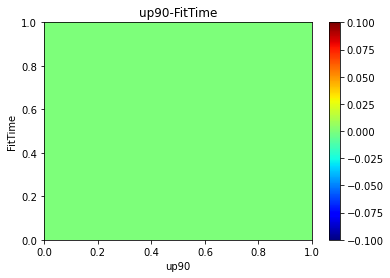

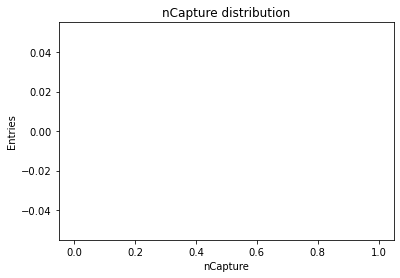

In [206]:
cutThreshold1n12(bkgres,nm=1,nCr=1,mRr=700,nRr=750)

In [189]:
def cutThreshold1n2(info,xname='E1Norm',yname='E2Norm',nm=0,qel=200, qer=600,eRr=17500,nCr=2,mRr=170000,nRr=700,t12=7,chi12=1.1,name='bkg'):
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']>=nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['E2Norm'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('E2Norm')
    ax.set_ylabel('FitTime')
    ax.set_title('E2-FitTime')
    fig.colorbar(h[3])
    index = index&((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm')
    ax.set_ylabel('E2Norm')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90/ns')
    ax.set_ylabel('FitTime/ns')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    
    index = index&(((info['E2Norm']>85)&(info['E2Norm']<260))|((info['E2Norm']>=260)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)#&((info['E1Norm']-info['E2Norm'])<40)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&((info['Up90']>=8)&(info['Up90']<2*(info['t2']-info['t1'])))
    #index = index&(info['Up90']>=8.5)#&(info['Up90']<2*(info['t2']-info['t1']))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['chi1']>info['chi2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&((info['chisquare1']>info['chisquare2']*2.0)|((info['t2']-info['t1'])>20))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['nDist']<nRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    ax.hist2d(info[index]['chi1']/info[index]['chi2'],info[index]['t2']-info[index]['t1'],bins=[100,100])
    ax.set_title('FitTime-chi12')
    ax.set_ylabel('FitTime/ns')
    ax.set_xlabel('chi12')
    fig,ax=plt.subplots()
    ax.hist(info[index]['t2']-info[index]['t1'],bins=100,range=[0,10])
    ax.set_title('FitTime distribution')
    ax.set_xlabel('{}/ns'.format('FitTime'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['michelDist'],bins=100)
    ax.set_title('michelDist distribution')
    ax.set_xlabel('{}/mm'.format('michelDist'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['chi1']/info[index]['chi2'],bins=100)
    ax.set_title('chisquare12 distribution')
    ax.set_xlabel('{}'.format('chisquare'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['Up90'],bins=100,range=[0,100])
    ax.set_xlabel('Up90/ns')
    ax.set_title('michelDist distribution')
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90')
    ax.set_ylabel('FitTime')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    fig,ax=plt.subplots()
    ax.hist(info[index]['nDist'],bins=100)
    ax.set_title('nCapture distribution')
    ax.set_xlabel('{}'.format('nCapture'))
    ax.set_ylabel('{}'.format('Entries'))
# nMichel=1,qEdep(200,600),eDepR(,17500],michelDist(,700],chisquare>1.5,FitTime>=6.2,E1(30,195),E2(100,430)
# sig: 3609 0.3609
# bkg: 2

429 7927 0.054118834363567556 0.0429
293 7927 0.03696228081241327 0.0293
238 7927 0.030023968714519993 0.0238
238 7927 0.030023968714519993 0.0238
230 7927 0.029014759682099156 0.023
230 7927 0.029014759682099156 0.023
203 7927 0.02560867919767882 0.0203


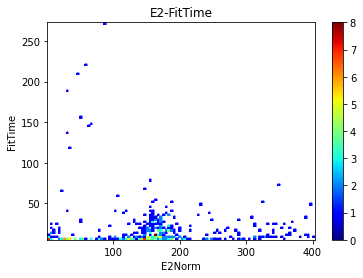

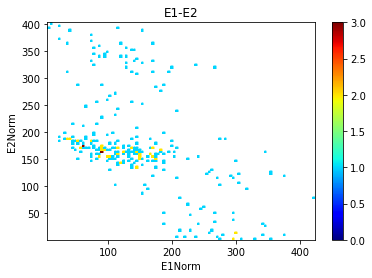

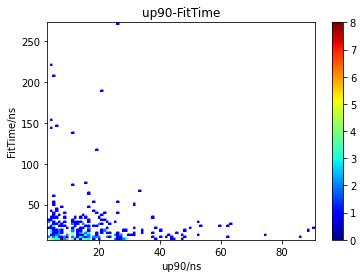

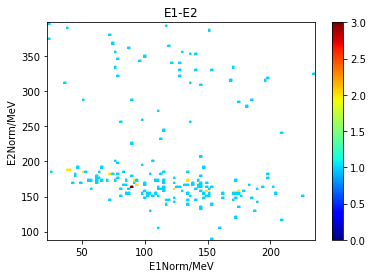

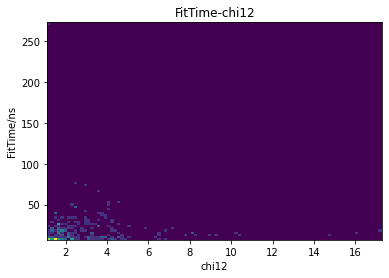

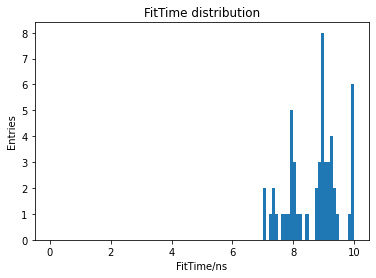

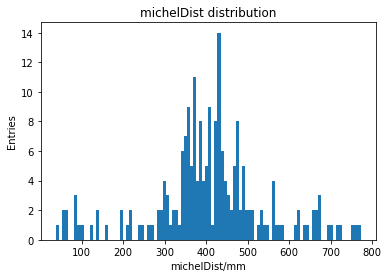

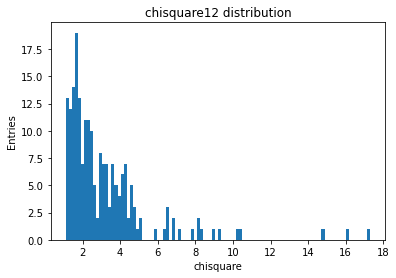

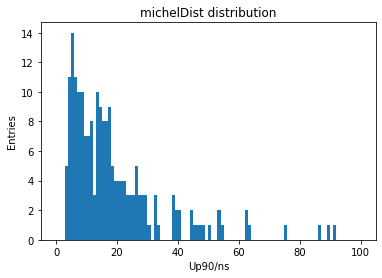

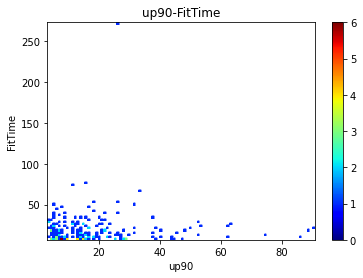

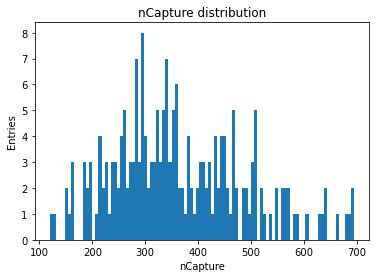

In [190]:
cutThreshold1n2(sigres,nm=1,nCr=2,mRr=800)

1378 47741 0.028864079093441696 0.008612930646532327
463 47741 0.00969816300454536 0.002893894694734737
19 47741 0.00039798077124484195 0.00011875593779688985
19 47741 0.00039798077124484195 0.00011875593779688985
13 47741 0.00027230263295699713 8.125406270313516e-05
13 47741 0.00027230263295699713 8.125406270313516e-05
0 47741 0.0 0.0


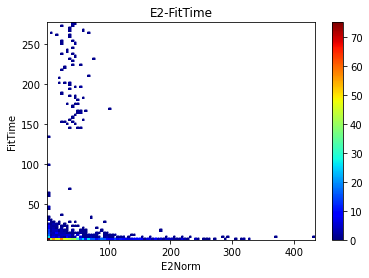

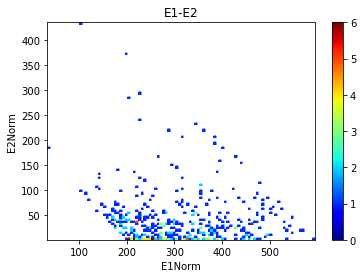

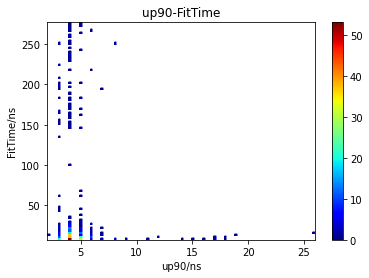

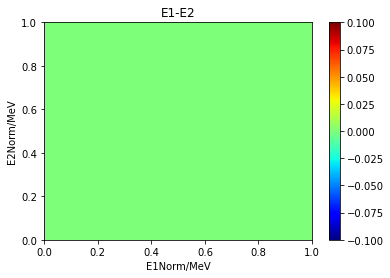

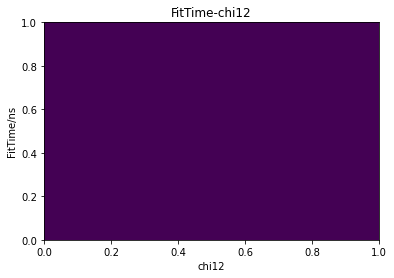

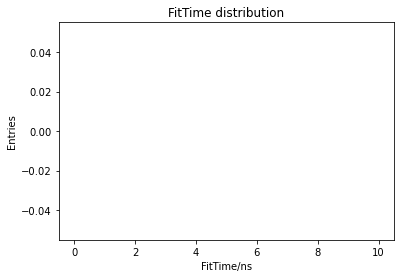

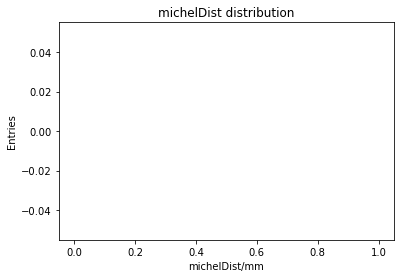

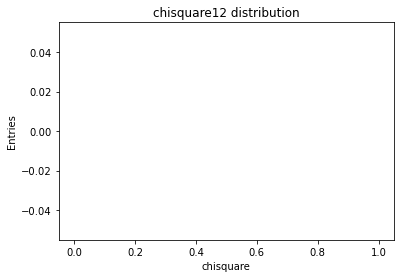

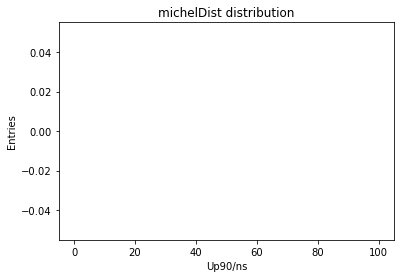

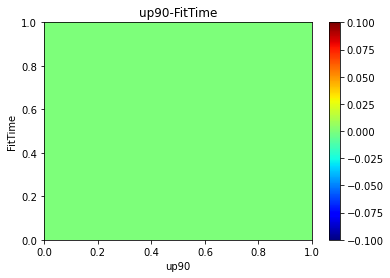

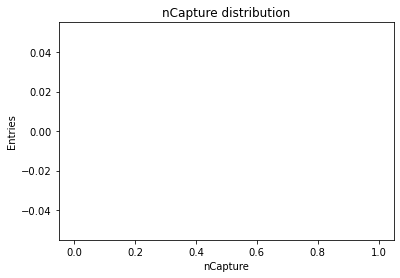

In [191]:
cutThreshold1n2(bkgres,nm=1,nCr=2,mRr=700)